# Análise de Dados sobre Popularidade de Músicas no Spotify 🎵📊

**Projeto Final | Módulo: Machine Learning 1 | Programa <BeTech\> by Braskem**

**Alunos:**
- Caio Henrique
- Daniel Costa
- Janderson Freitas
- Maria Carolina Barros
- Robinson

## Introdução

Este é o projeto final do módulo "Machine Learning 1". Nossa missão é prever a popularidade de músicas no Spotify. Imagine que estamos atuando como uma gravadora e desejamos criar um modelo capaz de antecipar quais músicas têm potencial para se tornarem populares.

Para realizar essa tarefa, utilizaremos o conjunto de dados do Spotify, disponível no Kaggle. Este conjunto de dados contém informações sobre diversas características das músicas, como *danceability*, *energy*, *loudness*, entre outras, bem como uma medida de *popularidade*.

Nosso objetivo é explorar esses dados, criar modelos de machine learning e identificar a popularidade das músicas. Com isso, esperamos tomar decisões mais informadas ao escolher músicas para promover e investir.

Vamos começar nossa jornada de análise e predição de popularidade de músicas!🎵🔍

## Contexto

O contexto desse projeto é o de uma gravadora que deseja utilizar dados e modelos de machine learning para identificar quais músicas têm potencial para se tornarem populares. Ao entender as características que influenciam na popularidade das músicas, a gravadora pode tomar decisões mais estratégicas em relação às músicas que promove e investe.

## Dataset

Utilizaremos o conjunto de dados do Spotify, disponível no [*Kaggle*](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset). Este conjunto contém informações detalhadas sobre as características de várias músicas, bem como sua popularidade.

## Objetivos

Nossos principais objetivos neste projeto são:

> Explorar e analisar o conjunto de dados do Spotify para entender as características das músicas.

> Desenvolver modelos de machine learning capazes de prever a popularidade das músicas.

Vamos mergulhar nos dados e iniciar nossa jornada de análise e predição de popularidade musical! 🎵🔍


In [ ]:
!pip install ydata_profiling

In [ ]:
!pip install pandas==1.3.0

In [ ]:
# Importando bibliotecas

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#from ydata_profiling import ProfileReport




#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
# Importando csv
df_raw = pd.read_csv('dataset.csv')
df_raw.info()

## Features Disponíveis

- **track_id:** O identificador exclusivo do Spotify para a faixa.
- **artists:** Nomes dos artistas que executaram a faixa.
- **album_name:** O título do álbum que inclui a faixa.
- **track_name:** O nome da faixa.
- **popularity:** Uma pontuação de popularidade variando de 0 a 100, onde 100 indica a maior popularidade.
- **duration_ms:** A duração da faixa em milissegundos.
- **explicit:** Indica se a faixa contém letras explícitas (true = sim, contém; false = não, não contém, ou desconhecido).
- **danceability:** Uma medida de quão adequada a faixa é para dançar, com valores entre 0,0 e 1,0.
- **energy:** A energia é uma medida perceptual de intensidade e atividade, variando de 0,0 a 1,0.
- **key:** A tonalidade musical da faixa, mapeada para a notação padrão de Classe de Altura (por exemplo, 0 = Dó, 1 = Dó♯/Ré♭, 2 = Ré e assim por diante). Se nenhuma tonalidade for detectada, o valor é -1.
- **loudness:** A intensidade geral da faixa em decibéis (dB).
- **mode:** Indica a modalidade da faixa (maior = 1, menor = 0).
- **speechiness:** Detecta a presença de palavras faladas na faixa, com valores entre 0 e 1.
- **acousticness:** Uma medida de confiança (0,0 a 1,0) indicando se a faixa é acústica (1,0 representa alta confiança na natureza acústica).
- **instrumentalness:** Prevê se uma faixa contém vocais (valores mais próximos de 1,0 sugerem ausência de conteúdo vocal).
- **liveness:** Detecta a presença de uma plateia na gravação, com valores entre 0,0 e 1,0.
- **valence:** Uma medida (0,0 a 1,0) descrevendo a positividade musical transmitida pela faixa.
- **tempo:** O tempo estimado da faixa em batidas por minuto (BPM).
- **time_signature:** Uma notação que especifica o número de batidas em cada compasso ou medida.
- **track_genre:** O gênero ao qual a faixa pertence.




In [ ]:
df_raw.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [ ]:
dataset = df_raw.copy()

In [ ]:
# Verificando nulos

dataset.isna().sum()

In [ ]:
dataset.head()

Tendo em vista que temos apenas 2 nulos dentre 114 mil entradas, podemos dropar esses dados


In [ ]:
dataset.dropna(inplace=True)
dataset.shape

Verificando número de ids únicas para músicas. (Identificando e removendo duplicatas)

In [ ]:
dataset['track_id'].nunique()

In [ ]:
duplicated = dataset[dataset['track_id'].duplicated(keep = False)]
print(duplicated.shape)
duplicated.groupby('track_id')['track_id'].count()

O dataframe tem 114.000 linhas e temos apenas 89.741 track_ids exclusivos, o que significa que há cerca de 24.259 valores duplicados no conjunto de dados. Ao investigar mais, descobrimos que havia 16.642 músicas diferentes ocorrendo várias vezes. Precisamos removê-los e limpar os dados para análise posterior.

In [ ]:
dataset = dataset[dataset['track_id'].duplicated(keep = 'first') == False]
dataset.shape

In [ ]:
dataset.drop('track_id', axis = 1, inplace = True )

## EDA

pandas-profiling

In [ ]:
profile = ProfileReport(dataset, title="Profiling Report")

In [ ]:
profile

## Feature Engineering

Precisamos normalizar os dados. Todas as entradas estão entre 0 e 1, exceto *duration_ms*, *tempo* e *time_signature*. O maior problema é *duration_ms* que está em Milissegundos, variando então entre 8586ms e 5237295ms. Vamos trazer a duração para minutos.

Foi possivel observar Alta dependencia linear entre (Energy + Loudness) e (Energy + Acousticness), Resolvemos retirar a coluna Energy para diminuir a correlação entre as features  

In [ ]:
dataset.drop('energy', axis = 1, inplace = True)

In [ ]:
dataset = dataset[['artists', 'popularity', 'danceability',
                  'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence',
                  'tempo', 'track_genre', 'duration_ms']]

In [ ]:
dataset = dataset.convert_dtypes()
dataset.dtypes

Passando Duração para minutos

In [ ]:
dataset['duration_minutes'] = dataset['duration_ms'] / 60000
dataset.drop('duration_ms', axis = 1, inplace = True)

## Lidando com outliers e filtrando dados não relevantes
Speechiness é uma medida de quão falada uma faixa é. Faixas acima de 0.6 são praticamente podcasts e talk-shows.

In [ ]:
index = dataset[dataset['speechiness'] > 0.6].index
dataset.drop(index, inplace=True)

Algumas músicas tem tempo em 0 BPM, o que não faz sentido pra nossa análise. Drop neles.

In [ ]:
index = dataset[dataset['tempo'] == 0].index
dataset.drop(index, inplace=True)

Desconsideramos faixas zeradas ou com duração superior a 25 minutos.

In [ ]:
index = dataset[(dataset['duration_minutes'] == 0) | (dataset['duration_minutes'] > 20)].index
dataset.drop(index, inplace=True)

## Estatística Descritiva
Variáveis Numéricas

In [ ]:
dataset.describe().T

Variáveis Categóricas

In [ ]:
dataset.describe(include= 'string')

In [ ]:
dataset['artists'].value_counts()

Verificando Artistas com apenas uma música

In [ ]:
sum(dataset['artists'].value_counts() == 1)

In [ ]:
dataset['track_genre'].value_counts()

## Usando standart scaler para normalização dos dados

In [ ]:
dataset.columns

Escalando features Numéricas

In [ ]:
dataset.info()

In [ ]:
num_cols = dataset.select_dtypes(include = 'float').columns
num_cols

In [ ]:
num_df = dataset[num_cols]
num_df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(num_df)

scaled = ss.fit_transform(num_df)
scaled_dataset = pd.DataFrame(scaled, columns = num_df.columns)

In [ ]:
dataset = dataset.drop(columns=num_df.columns, axis = 1)
dataset.reset_index(drop=True, inplace=True)
scaled_dataset.reset_index(drop=True, inplace=True)

dataset.shape, scaled_dataset.shape

In [ ]:
dataset = pd.concat([dataset, scaled_dataset], axis = 1)
dataset.shape

In [ ]:
dataset.describe().T

Encodando Features Categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
col = dataset['artists']
encoder.fit(col)
encoded_col = encoder.transform(col)
dataset['artist'] = encoded_col

In [ ]:
col = dataset['track_genre']

encoder.fit(col)

encoded_col = encoder.transform(col)

dataset['genre'] = encoded_col

In [ ]:
dataset.describe().T

## Regressão Linear

In [ ]:
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression as linreg
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error as MSE

In [ ]:
X = dataset.drop(columns = ['popularity', 'artists', 'track_genre'], axis = 1)
y = dataset['popularity']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1234)

In [ ]:
lin_reg = linreg()

lin_reg.fit(Xtrain, ytrain)

y_pred_train = lin_reg.predict(Xtrain)
y_pred = lin_reg.predict(Xtest)

Vamos agora calcular a perda entre os valores alvo reais no conjunto de teste e os valores previstos pelo modelo com o uso de uma função de custo chamada Root Mean Square Error (RMSE).

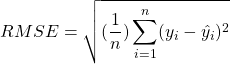

In [ ]:
mse_y_train = MSE(y_pred_train, ytrain)
mse_y_test = MSE(y_pred, ytest)

print('Referencia train RMSE:', np.sqrt(mse_y_train))
print('Referencia test RMSE:', np.sqrt(mse_y_test))

O RMSE de um modelo determina o ajuste absoluto do modelo aos dados. Em outras palavras, indica o quão próximos os pontos de dados reais estão dos valores previstos do modelo. Um valor baixo de RMSE indica um melhor ajuste e é uma boa medida para determinar a precisão das previsões do modelo.

## Checando Linearidade dos dados para validação do modelo de Regressão

In [ ]:
residual_matrix = pd.DataFrame({'Pred': y_pred_train, 'Actual': ytrain})
residual_matrix['Residuals'] = residual_matrix['Pred'] - residual_matrix['Actual']
residual_matrix

In [ ]:
plt.figure(figsize = (3,3), dpi = 100)
sns.histplot(residual_matrix['Residuals'], fill = True)
plt.xlabel('Residual')
plt.title('Residual Distribution')
plt.show()

A distribuição de Resíduos NÃO É NORMAL. Evitaremos a regressão linear.

https://medium.com/@lauradamaceno/entendendo-regress%C3%A3o-linear-as-suposi%C3%A7%C3%B5es-por-tr%C3%A1s-de-tudo-d0e29004c7f8

## Fold Cross Validation Modeling

In [ ]:
def cv_score(ml_model, cols):
    i = 1
    rmse_score = []
    X1 = X[cols]

    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

    for train_index, test_index in kf.split(X1):
        xtr, xval = X1.loc[train_index], X1.loc[test_index]
        ytr, yval = y.loc[train_index], y.loc[test_index]

        model = ml_model
        model.fit(xtr, ytr)
        pred_value = model.predict(xval)

        mse = MSE(pred_value, yval)
        rmse = np.sqrt(mse)
        print('\n for {} of KFold{}, RMSE Score is:  {}'.format(i, kf.n_splits, rmse))

        rmse_score.append(rmse)
        i+=1

    return rmse_score, pred_value, yval

## Decision Tree: Sem validação

In [ ]:
tree_model = DecisionTreeRegressor(min_samples_leaf = 25, min_samples_split = 25)

In [ ]:
xtr, xtest, ytr, ytest = train_test_split(X,y, test_size = 0.33, random_state = 423)

In [ ]:
tree_model.fit(xtr, ytr)

train_preds = tree_model.predict(xtr)
test_preds = tree_model.predict(xtest)

train_mse = MSE(train_preds, ytr)
test_mse = MSE(test_preds, ytest)

np.sqrt(train_mse), np.sqrt(test_mse)

## Cross Validated Decision Tree

In [ ]:
cv_dt, y_pred_value5, yval5 = cv_score(tree_model, cols = X.columns)
cv_dt

In [ ]:
from sklearn.feature_selection import RFE

model = tree_model
rfe = RFE(estimator = model, n_features_to_select = 1, step = 1)
rfe.fit(X,y)

In [ ]:
ranking_df = pd.DataFrame()
ranking_df['Feature'] = X.columns
ranking_df['Rank'] = rfe.ranking_

In [ ]:
ranked = ranking_df.sort_values(by = 'Rank')
ranked

In [ ]:
ranked['Feature'][:10].values

In [ ]:
cv_dt_top10, pred_value_top10, yval_top10 = cv_score(tree_model, cols = ranked['Feature'][:10].values)
cv_dt_top10

Comparação

In [ ]:
score_matrix = pd.DataFrame({'decision': cv_dt, 'decision10': cv_dt_top10})
score_matrix

In [ ]:
pred_value_top10.shape

In [ ]:
yval_top10.shape

# CV_DecisionTreeReg x CV_DecisionTreeReg-REF

In [ ]:
score_matrix_melted = score_matrix.reset_index().melt(id_vars='index',
                                                      var_name='Model',
                                                      value_name='Value')

# Set the style for the plot
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 3), dpi = 100)
sns.barplot(data=score_matrix_melted, x='index', y='Value',
            hue='Model', palette='muted')

plt.xlabel('Folds')
plt.ylabel('Values')
plt.title('Comparison of Models')
plt.legend(title='Models', loc='lower right', fontsize = 8)
plt.show()

# Plotando resultados

In [ ]:

fig = plt.figure(figsize =(8,8))

l = plt.plot(pred_value_top10, yval_top10, 'bo')

plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

xl = np.arange(min(pred_value_top10), 1.2*max(pred_value_top10),
               (max(pred_value_top10)-min(pred_value_top10))/10)
yl = xl
plt.plot(xl,yl,'r--')

plt.show()